# **Preexistent Well Analysis**
## Mean well production

This notebook contains code to generate a chart showing **monthly mean well production from preexistent wells.**

**First,** import relevant libraries and load mean well production data

* **Mean well production using all preexistent wells.**
* **Mean well production using only a selection (wells with no more than 60 missing values).**

In [6]:
# Import libraries
import pandas as pd
import os
import matplotlib.pyplot as plt
from matplotlib import lines
from matplotlib.patheffects import withStroke

In [5]:
# Load data
PATH = os.path.join('..', '..', 'data', 'average_production')
df_all_wells = pd.read_csv(PATH + '/avg_oil_prod_all_wells.csv')
df_y5_wells = pd.read_csv(PATH + '/avg_oil_prod_y5_wells.csv')

**Second,** create a line chart showing both series

In [13]:
# Year labels for x-axis labels
x_labels = []

for i in range(2000, 2020, 2):

    l = f'{i}'
    x_labels.append(l)

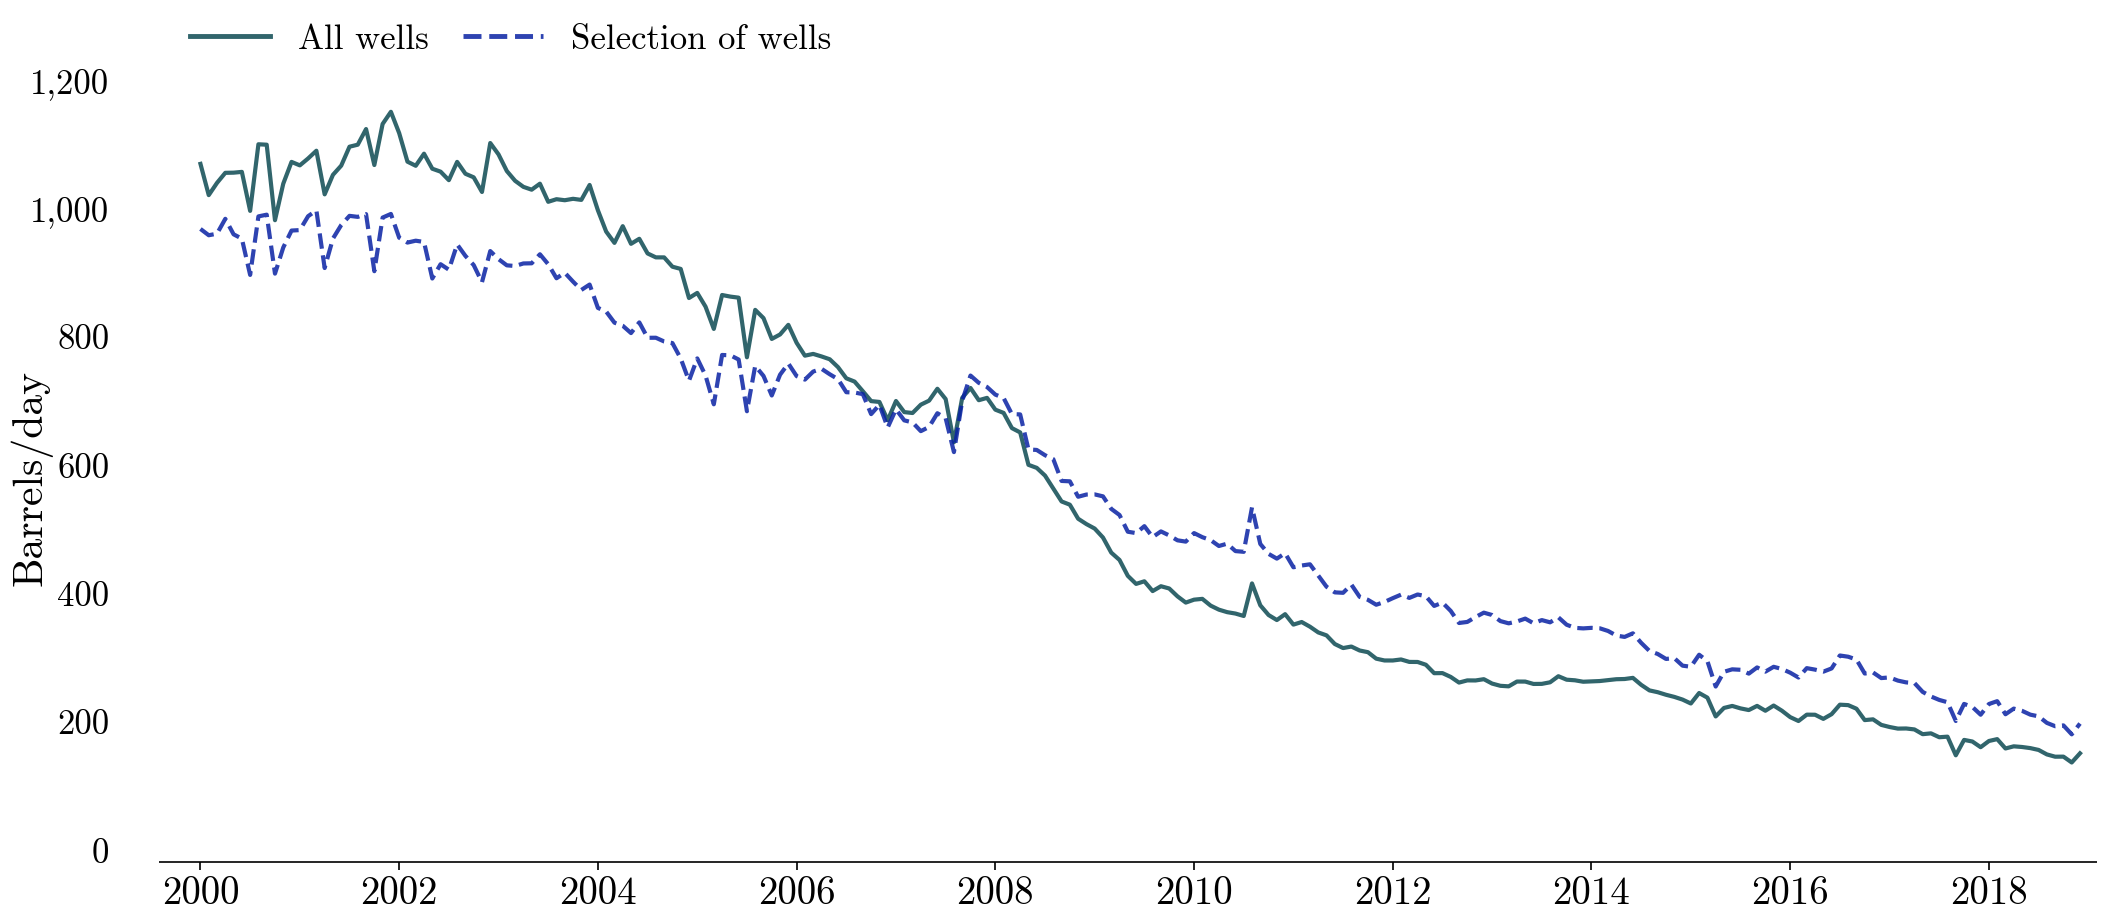

In [ ]:
# Create subplots object
fig, ax = plt.subplots(figsize=(25,10))

# Y-axis settings
ax.set_ylim(0, 1200)
ax.set_ylabel('Barrels/day', fontsize=30, fontweight=100, fontfamily="cmr10") # <- Axis name label
ax.yaxis.set_label_coords(-0.055, 0.5)
ax.yaxis.set_tick_params(labelleft=False, length=0)

# Y-axis labels
for i in range(0,1201,200):

    ax.text(
        -11, i, f'{i:,}', 
        ha="right", va="baseline", fontsize=25,
        fontfamily="cmr10", fontweight=100
    )


# X-axis settings
ax.set_xlim(-5, 229)
ax.xaxis.set_ticks(list(range(0, 229, 24)))
ax.xaxis.set_ticklabels(x_labels, fontsize=28, fontweight=100, fontfamily="cmr10")
ax.xaxis.set_tick_params(length=6, width=1.2)
ax.spines["bottom"].set_lw(1.2)
ax.spines["bottom"].set_capstyle("butt")

# Spines
ax.spines["left"].set_visible(False)
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)

# Mean well production series
ax.plot(df_all_wells['avg_oil_prod_bd'].values, lw=3, color="#0D4A52", alpha=0.85)
ax.plot(df_y5_wells['avg_oil_prod_bd'].values, lw=3, linestyle='--', color="#0922A4", alpha=0.85)

# Legend settings
legend_handles = [
    lines.Line2D([0], [0], color="#0D4A52", lw=3.5, alpha=0.85, label="All wells"),
    lines.Line2D([0], [0], color="#0922A4", lw=3.5, linestyle='--', alpha=0.85, label="Selection of wells")
]

ax.legend(
    handles=legend_handles,
    loc="upper left",
    bbox_to_anchor=(0.0, 1.13),
    bbox_transform=ax.transAxes,
    frameon=False,
    ncol=2,
    handlelength=2.3,
    columnspacing=1.0,
    prop={"family": "cmr10", "size": 25}
)

# Tight layout
#fig.tight_layout()

# Show plot
plt.show()
